<a href="https://colab.research.google.com/github/AIInspire/NLP/blob/main/Pytorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [26]:
# Build some data using linear regression simple equation
# y = weight * X + Bias

weight = 0.7
Bias = 0.3

X = torch.arange(0, 1, 0.02)
y = weight * X + Bias

X.shape, y.shape

(torch.Size([50]), torch.Size([50]))

In [27]:
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [28]:
y

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
        0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
        0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
        0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
        0.9300, 0.9440, 0.9580, 0.9720, 0.9860])

In [29]:
#Split the dat into training and testing (80% training - 20% testing)
train_split = int(0.8 * len(X))

x_train, x_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [30]:
def plot_predictions(train_data=x_train,
                      train_labels=y_train,
                      test_data=x_test,
                      test_labels=y_test,
                      predictions=None):
  ''' Plot training data, test data and compare predictions'''
  plt.figure(figsize=(10, 7))
  # Plot the training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  # Plot the testing data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # if i have a prediction
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

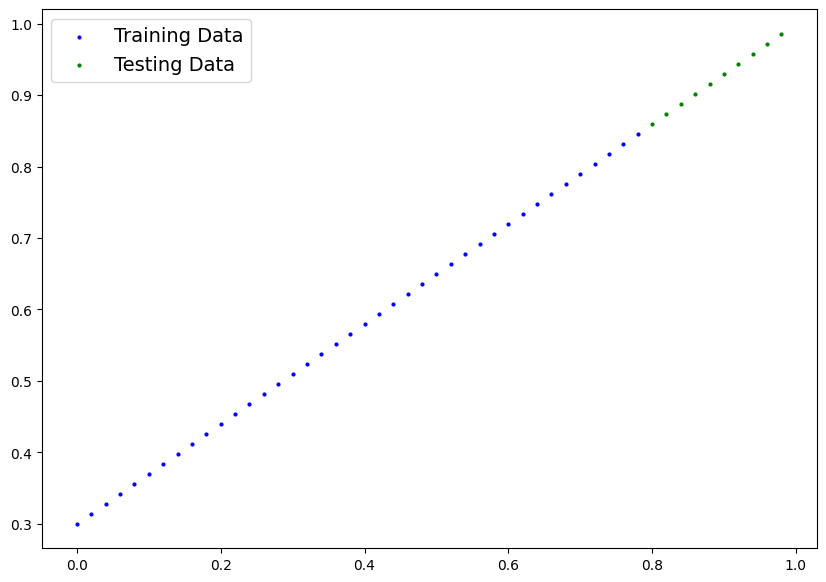

In [31]:
plot_predictions()

# Building Pytorch module

In [ ]:
# BUiltnueral Network
# nn.Module --> A more General way
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    # set the model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Make my input go through the layers(Building box)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [34]:
# check the content of the model
torch.manual_seed(42)
# Create an instance of the model
model_0 = LinearRegressionModelV1()

In [35]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

Pytorch have 3 modes:

1. training_mode : update params and y_predic get updated
2. Inference : better performance than no_grad
3. no_grade

In [36]:
# How to make a pediction using this model
with torch.inference_mode():
  y_preds = model_0(x_test) # Will go through our forword fun

In [37]:
print(len(x_test), len(y_preds))

10 10


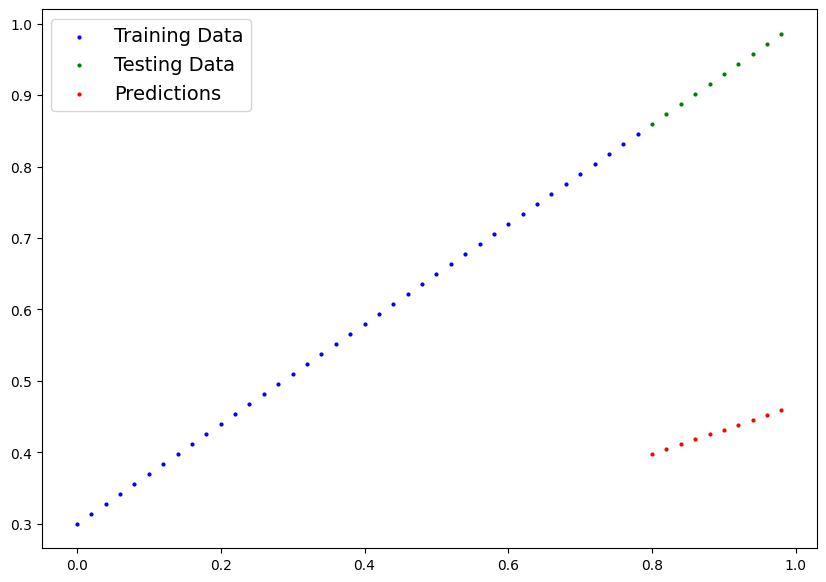

In [40]:
plot_predictions(predictions=y_preds)

- Bad predictions --> we will need to set a loss fun

In [41]:
# loss function
loss_fn = nn.L1Loss() # MAE loss function for our model

In [42]:
# Set optimizer to update the model weights
#lr: The step I take towards the right solution
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

**Pytorch Training loop and Testing loop**

For the training loop, we will build the following steps:

1. Forward pass
2. Calculate the loss
3. Zero gradients
4. Perform Backpropagation on the loss
5. Update the optimizer(gradient decent)

In [46]:
torch.manual_seed(42)

epochs = 100

#Create lists to track results
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  #Training
  model_0.train()

  # 1. Forward Pass
  y_pred = model_0(x_train) # --> (y_pred, y_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Perform Backpropagation on the loss
  loss.backward()

  # 5. Update the optimizer(gradient decent)
  optimizer.step()


  # TESTING

  #Put the model in the evaluation mode
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_0(x_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # Print what's going on
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 10 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss: 0.04819049686193466 
Epoch: 20 | MAE Train Loss: 0.01758546568453312 | MAE Test Loss: 0.04060482233762741 
Epoch: 30 | MAE Train Loss: 0.014155393466353416 | MAE Test Loss: 0.03233227878808975 
Epoch: 40 | MAE Train Loss: 0.010716589167714119 | MAE Test Loss: 0.024059748277068138 
Epoch: 50 | MAE Train Loss: 0.0072835334576666355 | MAE Test Loss: 0.016474086791276932 
Epoch: 60 | MAE Train Loss: 0.0038517764769494534 | MAE Test Loss: 0.008201557211577892 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 


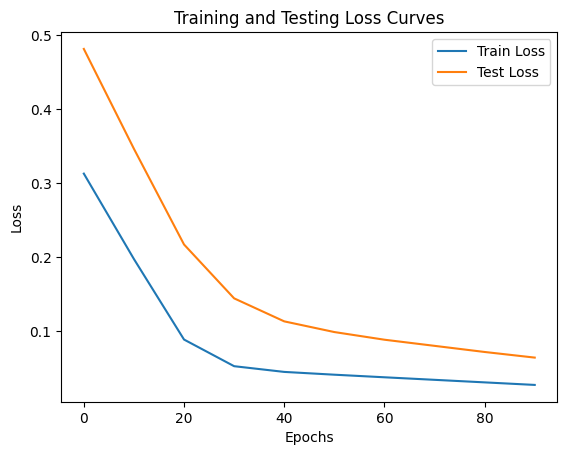

In [45]:
# plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Testing Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [47]:
# New weight | New bias
# -> Old Values before training
#[Parameter containing:
# tensor([0.3367], requires_grad=True),
# Parameter containing:
# tensor([0.1288], requires_grad=True)]

model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

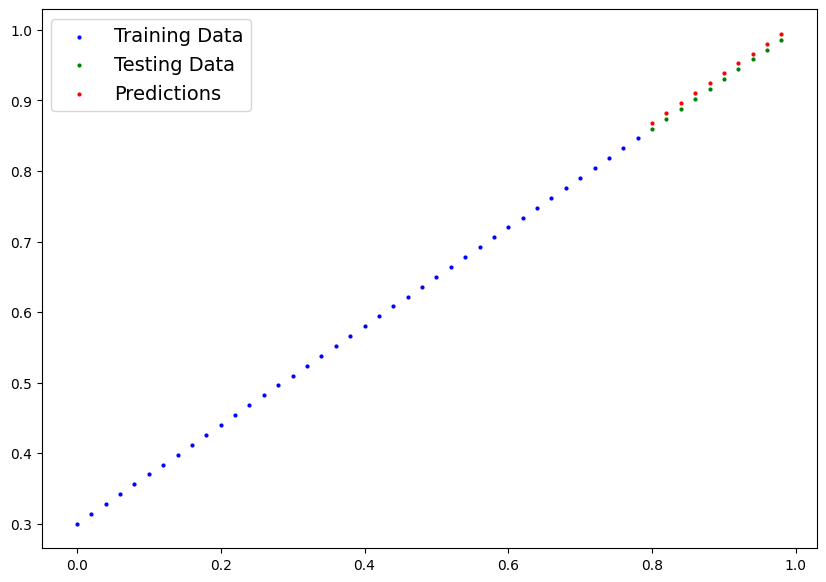

In [49]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(x_test)

plot_predictions(predictions=y_preds)

In [51]:
# pytorch model extensions -> pt / pth
#Not the optimal way to save a model
torch.save(model_0, 'model_0.pt')

In [52]:
# The optimal way to save a model
from pathlib import Path

Model_path = Path('models')
Model_path.mkdir(parents=True, exist_ok=True)

# Create a model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = Model_path / MODEL_NAME

# Save the model state dict
torch.save(model_0.state_dict(),MODEL_SAVE_PATH)
print(f"Saving model to: {MODEL_SAVE_PATH}")


Saving model to: models/01_pytorch_workflow_model.pth


# Try 2 Layers

In [54]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=1,
                            out_features=5)
    self.act1 = nn.ReLU()
    self.layer2 = nn.Linear(in_features=5,
                            out_features=2)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    out = self.layer1(x)
    out = self.act1(out)
    out = self.layer2(out)
    return out

In [55]:
#Check the content of this model
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
list(model_1.parameters())

[Parameter containing:
 tensor([[ 0.7645],
         [ 0.8300],
         [-0.2343],
         [ 0.9186],
         [-0.2191]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2018, -0.4869,  0.5873,  0.8815, -0.7336], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3887,  0.0837,  0.3304,  0.0606,  0.2156],
         [-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], requires_grad=True),
 Parameter containing:
 tensor([-0.2060, -0.0524], requires_grad=True)]